In [1]:
import torch 
from torch.utils.data import Dataset, DataLoader
import numpy as np
import wfdb
import matplotlib.pyplot as plt
import scipy as sc

### Spectrogram test

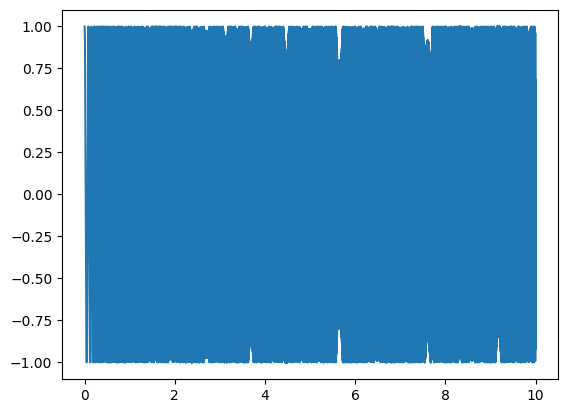

In [2]:
from scipy.signal import chirp

T = 10
Ts = 0.001
t = np.arange(0,T,Ts)
signal = chirp(t, f0=10, t1=8, f1=350, method='linear')

plt.figure()
plt.plot(t, signal)
plt.show()

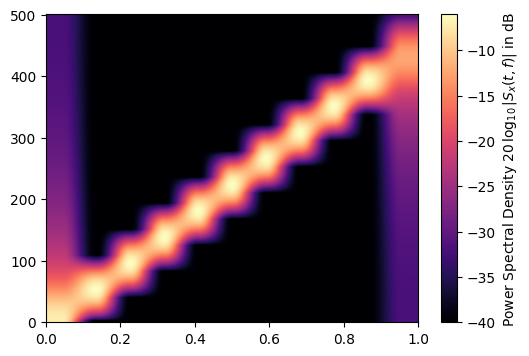

In [ ]:
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian

w_T = 1
w_N = int(w_T / Ts)
g_std = 8
w = gaussian(w_N, std=g_std, sym=True)
SFT = ShortTimeFFT(w, hop=w_N, fs=(1/Ts), scale_to='magnitude')
Sx2 = SFT.spectrogram(signal)

fig1, ax1 = plt.subplots(figsize=(6., 4.))  # enlarge plot a bit
Sx_dB = 10 * np.log10(np.fmax(Sx2, 1e-4))  # limit range to -40 dB
im1 = ax1.imshow(Sx_dB, origin='lower', aspect='auto',
                 extent=SFT.extent(T), cmap='magma')
fig1.colorbar(im1, label='Power Spectral Density ' +
              r"$20\,\log_{10}|S_x(t, f)|$ in dB");

### WFDB

[     79 1633050 1633999 1900120 1901525 2270154 2270587 2574098 2575190
 2591265 2593950 2618884 2619973 2877400 2880801 4350349 4360987]


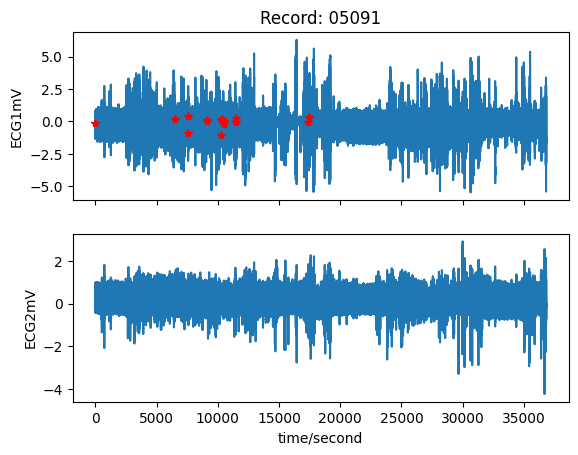

In [ ]:
import wfdb.processing

record = wfdb.rdrecord('Data/mit_bih_atrial_fibrillation_database/files/05091')
annotation = wfdb.rdann('Data/mit_bih_atrial_fibrillation_database/files/05091', 'atr')

wfdb.plot_wfdb(record=record, annotation=annotation)

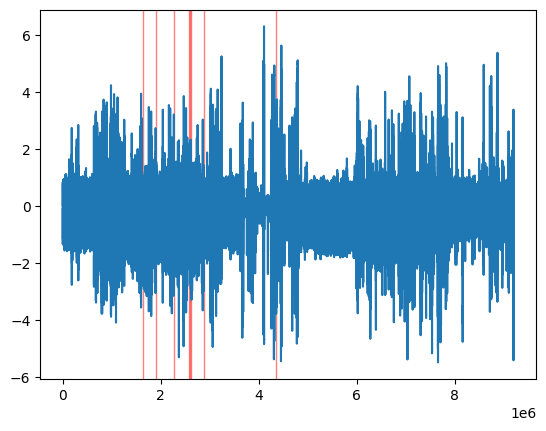

In [ ]:
ann_labels = annotation.aux_note
ann_samples = annotation.sample
waveform = record.p_signal[ann_samples[0]:]

afib_mask = np.zeros(waveform.shape[0])
ranges_N = []
ranges_AFIB = []
for i, label in enumerate(ann_labels):
    if i != (len(ann_labels) - 1):
        if label == '(AFIB':
            afib_mask[ann_samples[i]:ann_samples[i+1]] = 1
            ranges_AFIB.append([ann_samples[i], ann_samples[i+1]])
        else:
            ranges_N.append([ann_samples[i], ann_samples[i+1]])
    else:
        if label == '(AFIB':
            afib_mask[ann_samples[i]:] = 1
            ranges_AFIB.append([ann_samples[i], (waveform.shape[0]-1)])
        else:
            ranges_N.append([ann_samples[i], (waveform.shape[0]-1)])

ranges_AFIB = np.array(ranges_AFIB)
ranges_N = np.array(ranges_N)

fig, ax = plt.subplots()
ax.plot(waveform[:,0]);
for x1, x2 in ranges_AFIB:
    ax.axvspan(x1, x2, alpha=0.5, color='red')
plt.show();